<img src='http://www.u.arizona.edu/~hammond/hltlogo1.png' style="float:right">

Linguistics 578<br>
Fall 2022<br>
Hammond

## Things to remember about any homework assignment:

1. For this assignment, you will edit this jupyter notebook and turn it in. Do not turn in pdf files or separate `.py` files.
1. Late work is not accepted.
1. Given the way I grade, you should try to answer *every* question, even if you don't like your answer or have to guess.
1. You may *not* use `python` modules that we have not already used in class.
1. You may certainly talk to your classmates about the assignment, but everybody must turn in *their own* work. It is not acceptable to turn in work that is essentially the same as the work of classmates.
1. All code must run. It doesn't have to be perfect, it may not do all that you want it to do, but it must run without error.
1. Code must run in reasonable time. Assume that if it takes more than *5 minutes* to run (on your machine), that's too long.
1. Please do not add, remove, or copy autograded cells.
1. Make sure to select `restart, run all cells` from the `kernel` menu when you're done and before you turn this in!

# ***

***my name***: Rachel the Speech Queen Hansen

***people I talked to about the assignment***: my fellow goddesses: Shashi, Jen, and Gaby

***

## Homework #2

Here are the imports. Please do not import anything else.

In [1]:
import numpy as np
from scipy.io import wavfile
from numpy.fft import rfft,irfft,rfftfreq
import matplotlib.pyplot as plt
import librosa

1. Write a function that will break a sound file into a specific number of windows.

In [2]:
def makewindows(w,n):
    '''break a wave file into windows
    args:
        w: the sound file (as a numpy array)
        n: a specific number of windows
    returns:
        the windows as a numpy array/matrix.
        (each row is a window)
    '''
    rem = len(w)%n
    bin = len(w) -int(rem)
    p = int(bin)/n
    chunks = [w[x:x+int(p)] for x in range(0, int(bin), int(p))]
  #  print (chunks)
  #  print (np.array(chunks).shape)
    return np.array(chunks)

In [3]:
res = makewindows(np.arange(50),8)
assert res.shape == (8,6)

In [4]:
assert len(res[7]) == 6

In [5]:
assert res[3,4] == 22

2. Imagine you have a sound file that is 1.2seconds long and sampled at 16000 samples a second that you break into windows that are .025sec long. How many samples occur in each window? (Round to the nearest whole number.)

In [6]:
#x = ?
x =16000*.025
print (x)
#raise NotImplementedError()

400.0


In [7]:
#this test is hidden!

3. Using the file `mhi.wav`, compute a cepstrum over the whole file and save it as `iceps`. Make sure to load the wave with `wavfile.read()`.

In [8]:
#iceps = ?
fs,w = wavfile.read('mhi.wav')

print(f'sample rate: {fs}')

spec = rfft(w)
freqs = rfftfreq(len(w),1/fs)
powerspec = np.abs(spec)**2
iceps = irfft(np.log(powerspec))

#plt.subplot(3,1,1)
#plt.plot(w)
#plt.subplot(3,1,2)
#plt.plot(freqs[:8000],powerspec[:8000])
#plt.subplot(3,1,3)
#noise in lowest cepstrum values
#plt.plot(range(30,500),np.abs(iceps)[30:500])
#plt.show()
#raise NotImplementedError()

sample rate: 44100


In [9]:
assert type(iceps) == np.ndarray

In [10]:
assert np.isclose(iceps.shape[0],117626,atol=5)

Here we plot the lower cepstrum values:

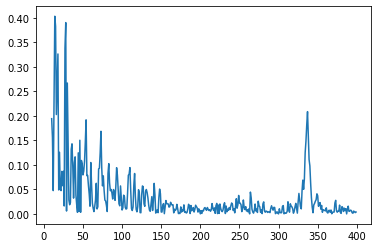

In [11]:
plt.plot(np.arange(10,400),np.abs(iceps[10:400]))
plt.show()

4. What is the frequency `f` and quefrency `q` of the fundamental frequency?

In [12]:
q = 350
f = 44100/int(q)
print (f)
#raise NotImplementedError()

126.0


In [13]:
#this test is hidden!

In [14]:
#this test is hidden!

5. With the wavefile you loaded for question \#3, take the samples from 1000 to 1500 and compute a 4th-order LPC.

In [15]:
#lpc = ?
fs,w = wavfile.read('mhi.wav')
lpc = librosa.lpc(w[999:1499].astype(float), 4)
#print (lpc [1])

#raise NotImplementedError()

In [16]:
assert lpc.shape[0] == 5

In [17]:
assert lpc[0] == 1

In [18]:
assert np.isclose(lpc[1],-0.69,atol=.1)